In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

In [3]:
file_path = r"C:\Users\dipak\OneDrive\desktop\github_ai\ml_with_python\one_module\simple_linear_regression\FuelConsumptionCo2.csv"
df = pd.read_csv(file_path)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1048,2014,VOLKSWAGEN,PASSAT TDI CLEAN DIESEL,MID-SIZE,2.0,4,A6,D,8.1,5.9,7.1,40,192
288,2014,CHRYSLER,300 FFV,FULL-SIZE,3.6,6,A8,X,12.4,7.7,10.3,27,237
826,2014,MITSUBISHI,OUTLANDER,SUV - SMALL,2.4,4,AV6,X,9.5,7.5,8.6,33,198
119,2014,BMW,M5,MID-SIZE,4.4,8,M6,Z,16.2,10.9,13.8,20,317
307,2014,DODGE,CHARGER AWD FFV,FULL-SIZE,3.6,6,A8,X,12.8,8.6,10.9,26,251


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
237,4.3,6,11.8,271
474,6.2,8,20.1,322
697,2.0,4,8.5,196
761,3.5,6,11.3,260
860,5.6,8,17.3,398
343,4.6,8,16.2,373
159,3.6,6,10.9,251
422,2.0,4,9.1,209
149,2.0,4,9.9,228


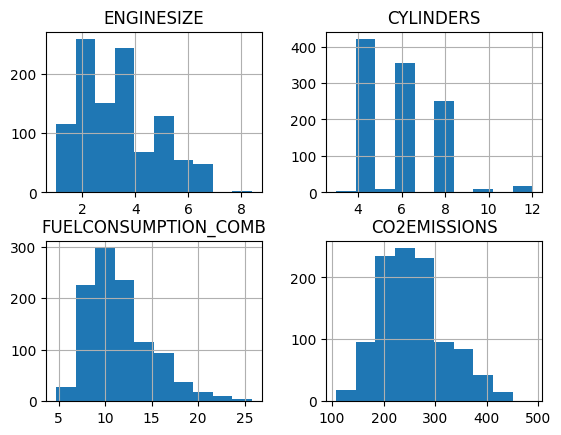

In [19]:
cdf.hist()
plt.show()

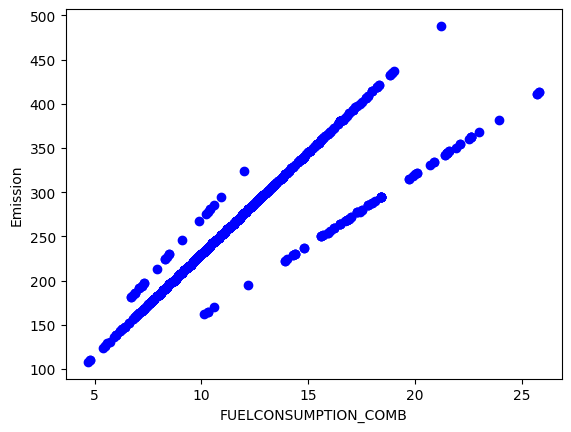

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

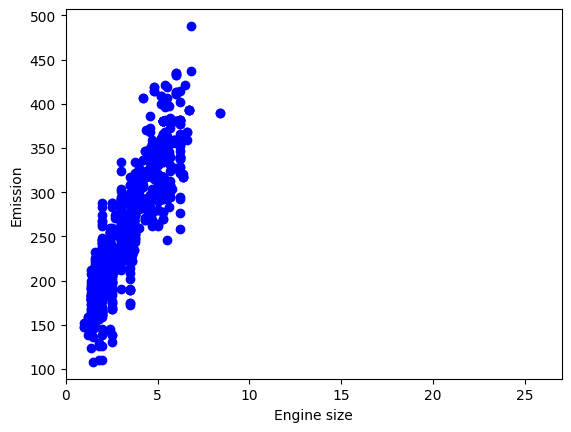

In [22]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

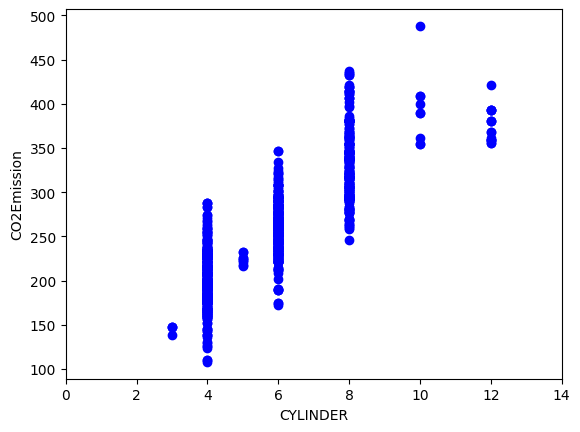

In [25]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("CYLINDER")
plt.ylabel("CO2Emission")
plt.xlim(0,14)
plt.show()

In [26]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [27]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

In [51]:
from sklearn import linear_model

In [52]:
regressor = linear_model.LinearRegression()

In [53]:
X_train.ndim

1

Since X_train is 1 dimensional we will reshape it to 2 dimensional as sklearn expects 2D array

In [54]:
regressor.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [55]:
regressor.intercept_

126.28970217408721

In [56]:
regressor.coef_[0]

38.992978724434074

Text(0, 0.5, 'Emission')

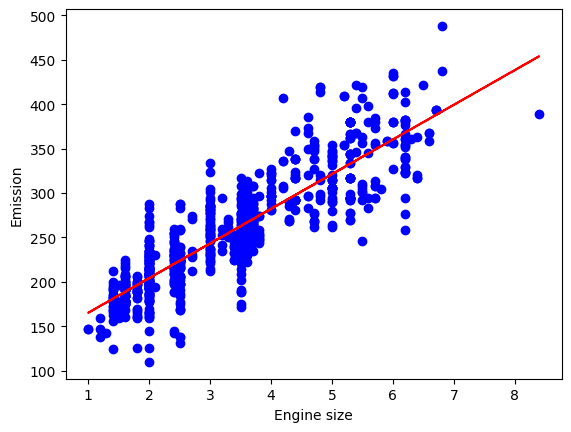

In [57]:
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_,"-r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
# Use the predict method to make test predictions

In [60]:
y_test_ = regressor.predict(X_test.reshape(-1,1))

In [62]:
print(f"mean absolute error: {mean_absolute_error(y_test,y_test_)}")
print(f"mean_squared_error: {mean_squared_error(y_test,y_test_)}")
print(f"roor mean squared error: {np.sqrt(mean_squared_error(y_test,y_test_))}")
print(f"R2-score: {r2_score(y_test,y_test_)}")

mean absolute error: 24.09725741170784
mean_squared_error: 985.9381692274999
roor mean squared error: 31.399652374309813
R2-score: 0.7615595731934373


Text(0, 0.5, 'Emission')

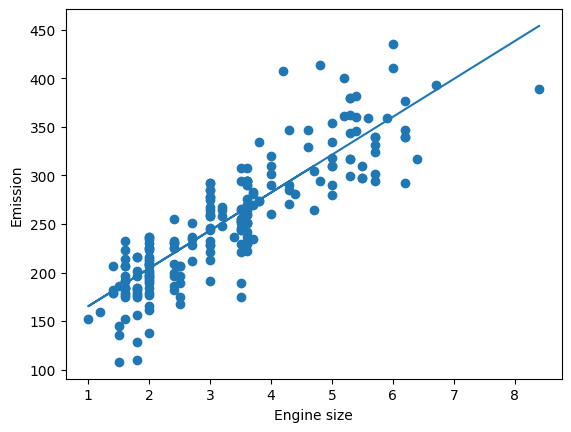

In [65]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regressor.coef_*X_test+regressor.intercept_)
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [66]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.


In [ ]:
X = df["FUELCONSUMPTION_COMB"].to_numpy()
# y = df["CO2EMISSIONS"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=42)

In [73]:
regr = linear_model.LinearRegression()

In [76]:
regr.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [80]:
y_test_ = regr.predict(X_test.reshape(-1,1))

In [82]:
print("Mean Squared Error:",mean_squared_error(y_test,y_test_))

Mean Squared Error: 797.4346310097205
